# **Oasis Infobyte Intenship**
## **Task 4**: Email spam Detection with Machine Learning

We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.In this Project, use Python to build an email spam detector.

### **Step 1: Import Necessary Libraries**

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score


### **Step 2 : Load the Dataset**

In [68]:
# Load the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

In [69]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


### **Step 3 : Explore the Dataset**

In [70]:
# Explore the first 10 rows

df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [71]:
# Explore the last 10 rows

df.tail(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...,NaN,NaN,NaN
5563,ham,Ard 6 like dat lor.,NaN,NaN,NaN
5564,ham,Why don't you wait 'til at least wednesday to ...,NaN,NaN,NaN
5565,ham,Huh y lei...,NaN,NaN,NaN
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [72]:
#  Explore Total number of Rows and columns

print("No of rows and columns:",df.shape)
print("Total no of rows and columns:",df.size)

No of rows and columns: (5572, 5)
Total no of rows and columns: 27860


In [73]:
#Explore the Dimension of the dataset

print("The Dimension of the dataset is:",df.ndim)

The Dimension of the dataset is: 2


In [74]:
# Total Columns name in dataset

df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [75]:
#Explore the data types of each column

df.dtypes

,0
v1,object
v2,object
Unnamed: 2,object
Unnamed: 3,object
Unnamed: 4,object


In [76]:
# Checking Structural Summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [77]:
# Checking Statistical Summary of the dataset

df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [78]:
#Remove unnecessary columns

df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)


In [79]:
# Checking Null values present ot not'

df.isnull()

,v1,v2
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [80]:
df.isnull().sum()

,0
v1,0
v2,0


In [81]:
# Rename the column names

df = df.rename(columns={"v1": "label", "v2": "message"})
df.columns

Index(['label', 'message'], dtype='object')

In [82]:
# Unique values in 'label' column

print(df['label'].unique())

['ham' 'spam']


In [83]:
# Unique values in 'message' column

print(df['message'].unique())

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name']


In [84]:
# Unique values in 'message' column

print(len(df['message'].unique()))

5169


In [85]:
# Count the values

print(df['label'].value_counts())

label
ham     4825
spam     747
Name: count, dtype: int64


In [86]:
# Clean text in labels


df['label'] = df['label'].str.strip().str.lower()
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### **Step 4: Visualize the data**

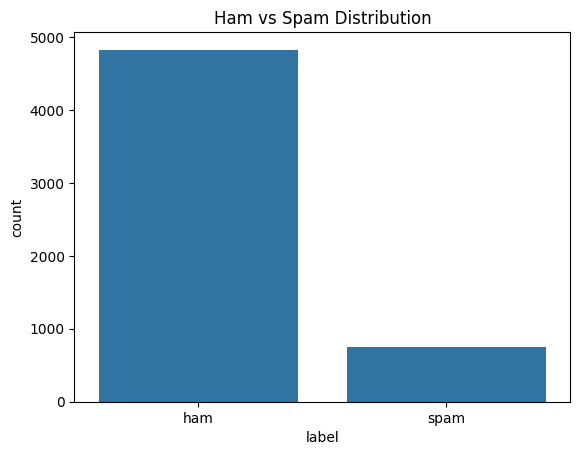

In [87]:
sns.countplot(x='label', data=df)
plt.title('Ham vs Spam Distribution')
plt.show()


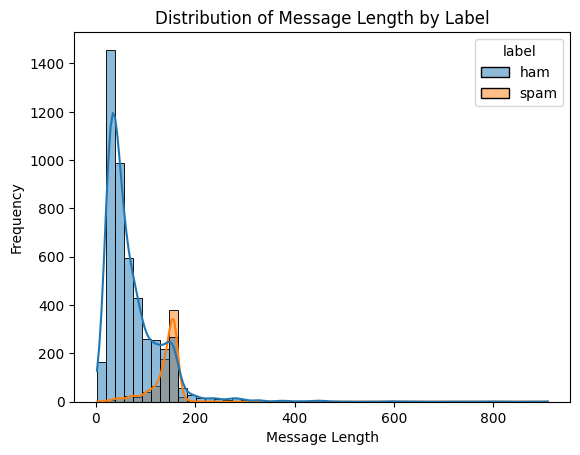

In [88]:
df['message_length'] = df['message'].apply(len)

sns.histplot(data=df, x='message_length', hue='label', bins=50, kde=True)
plt.title("Distribution of Message Length by Label")
plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.show()


label
ham     4825
spam     747
Name: count, dtype: int64


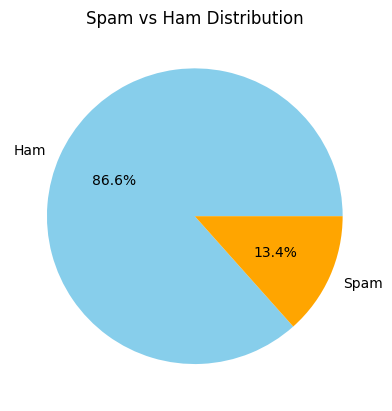

In [89]:
print(df['label'].value_counts())

# Visualize
df['label'].value_counts().plot.pie(autopct="%1.1f%%", colors=['skyblue', 'orange'], labels=['Ham', 'Spam'])
plt.title("Spam vs Ham Distribution")
plt.ylabel("")
plt.show()

### **Step 5 : Preprocess the Data**

In [90]:
# Convert Text Labels to Numbers


df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})
print(df[['label', 'label_num']].head())

  label  label_num
0   ham          0
1   ham          0
2  spam          1
3   ham          0
4   ham          0


In [91]:
# Split the Data (Training and Testing)

X = df['message']        # Features (text)
y = df['label_num']      # Target (0 or 1)

In [92]:
# 80% for training, 20% for testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
# Convert Text to Numbers (TF-IDF Vectorization)


vectorizer = TfidfVectorizer(stop_words='english')

# Fit on training, transform both train and test
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [94]:
# Train the Naive Bayes Classifier


model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [95]:
# Make Predictions

y_pred = model.predict(X_test_tfidf)

### **Step 6 : Evaluate the model**

In [96]:
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

ROC AUC Score: 0.8766666666666667
Precision: 1.0
Recall: 0.7533333333333333
F1 Score: 0.8593155893536122


In [97]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.9668161434977578

Confusion Matrix:
 [[965   0]
 [ 37 113]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [98]:
# Try a Custom Email Message

test_message = ["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."]


test_tfidf = vectorizer.transform(test_message)

prediction = model.predict(test_tfidf)

print("Spam" if prediction[0] == 1 else "Ham")

Ham


### **✅ Conclusion:**
In this project, we successfully built an Email Spam Detection System using Python and machine learning. We began by exploring the dataset, cleaning and preprocessing the text data, and engineering useful features like message length. We then converted the text into numerical features using TF-IDF vectorization and trained a Multinomial Naive Bayes classifier.

The model demonstrated strong performance in classifying messages as spam or not spam with high accuracy. Additionally, the exploratory data analysis helped uncover patterns such as spam messages typically being longer and using specific word patterns.

This project shows how natural language processing (NLP) and machine learning can be effectively combined to solve real-world problems like email spam filtering, providing the foundation for intelligent email management systems.